# DAY 7: Neural networks for classification

### Machine Learning and Computational Statistics (DSC6232)

Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

Due: August 2nd, 2:00 pm Kigali Time

**First name**: LONGIN


**Last name**: DUSENGEYEZU

**ID**:220020609

## Learning Goals:

1. train a neural network for classification
2. diagnose training performance of a NN using the traceplot
3. compare classifiers using the ROC curve and AUC


### Import necessary libraries

In [ ]:
import numbers
#import libraries for implementing neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
#import sklearn packages
import sklearn
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_moons, make_circles
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score
#import libraries of data manipulation, matrix operations and visualization
import pandas as pd
import numpy as np
from numpy import sqrt
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline

#### Auxiliary functions to generate and visualize data.
**No need to read through!**

In [ ]:
def scatter_plot_data(x, y, ax, limit=None):
    '''
    scatter_plot_data scatter plots the patient data. A point in the plot is colored 'red' if cancerous 
    and blue otherwise.
    
    input:
       x - a numpy array of size N x 2, each row is a patient, each column is a biomarker
       y - a numpy array of length N, each entry is either 0 (no cancer) or 1 (cancerous)
       ax - axis to plot on
    returns: 
       ax - the axis with the scatter plot
    '''
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.2, c='red', label='class 1')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.2, c='blue', label='class 0')
    ax.set_xlabel('marker 1')
    ax.set_ylabel('marker 2')
    if limit is None:
      ax.set_xlim((-2.5, 2.5))
      ax.set_ylim((-2.5, 2.5))     
    else:
      ax.set_xlim(limit)
      ax.set_ylim(limit)     
    ax.legend(loc='best')
    return ax

def plot_decision_boundary(x, y, model, ax, limit=None, poly_degree=1, threshold=0.5):
    '''
    plot_decision_boundary plots the training data and the decision boundary of the classifier.
    input:
       x - a numpy array of size N x 2, each row is a patient, each column is a biomarker
       y - a numpy array of length N, each entry is either 0 (no cancer) or 1 (cancerous)
       model - the 'sklearn' classification model
       ax - axis to plot on
       poly_degree - the degree of polynomial features used to fit the model
       threshold - the classification threshold
    returns: 
       ax - the axis with the scatter plot
    
    '''
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.4, c='red', label='class 1')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.4, c='blue', label='class 0')
    
    # Create mesh
    if limit is None:
      interval = np.arange(-2.5, 2.5, 0.01)
    else:
      interval = np.arange(limit[0], limit[1], 0.05)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_degree > 1):
        polynomial_features = PolynomialFeatures(degree=poly_degree)
        xx = polynomial_features.fit_transform(xx)
    if threshold != 0.5:
      yy_prob = model.predict_proba(xx)[:, 1]
      yy = yy_prob
      yy[yy_prob >= threshold] = 1
      yy[yy_prob < threshold] = 0
    else:
      yy = model.predict(xx)    
    yy = yy.reshape((n, n))


    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='bwr')
    ax.contour(x1, x2, yy, levels=[0.5], colors='black', linewidths=0.4)
    ax.set_xlabel('marker 1')
    ax.set_ylabel('marker 2')
    if limit is None:
      ax.set_xlim((-2.5, 2.5))
      ax.set_ylim((-2.5, 2.5))     
    else:
      ax.set_xlim(limit)
      ax.set_ylim(limit)  
    ax.legend(loc='best')
    return ax

def plot_decision_boundary_neoron(x, y, model, ax, limit=None, poly_degree=1, threshold=0.5):
    '''
    plot_decision_boundary plots the training data and the decision boundary of the classifier.
    input:
       x - a numpy array of size N x 2, each row is a patient, each column is a biomarker
       y - a numpy array of length N, each entry is either 0 (no cancer) or 1 (cancerous)
       model - the 'sklearn' classification model
       ax - axis to plot on
       poly_degree - the degree of polynomial features used to fit the model
       threshold - the classification threshold
    returns: 
       ax - the axis with the scatter plot
    
    '''
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], alpha=0.4, c='red', label='class 1')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], alpha=0.4, c='blue', label='class 0')
    
    # Create mesh
    if limit is None:
      interval = np.arange(-2.5, 2.5, 0.01)
    else:
      interval = np.arange(limit[0], limit[1], 0.05)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_degree > 1):
        polynomial_features = PolynomialFeatures(degree=poly_degree)
        xx = polynomial_features.fit_transform(xx)
    if threshold != 0.5:
      yy_prob = model.predict_proba(xx)
      yy = yy_prob
      yy[yy_prob >= threshold] = 1
      yy[yy_prob < threshold] = 0
    else:
      yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='bwr')
    ax.contour(x1, x2, yy, levels=[0.5], colors='black', linewidths=0.4)
    ax.set_xlabel('marker 1')
    ax.set_ylabel('marker 2')
    if limit is None:
      ax.set_xlim((-2.5, 2.5))
      ax.set_ylim((-2.5, 2.5))     
    else:
      ax.set_xlim(limit)
      ax.set_ylim(limit)  
    ax.legend(loc='best')
    return ax


def make_unbalanced_moons(n_samples=100, p=0.2, shuffle=True, noise=None, random_state=None):
    if isinstance(n_samples, numbers.Integral):
        n_samples_out = int(n_samples * p)
        n_samples_in = n_samples - n_samples_out
    else:
        try:
            n_samples_out, n_samples_in = n_samples
        except ValueError:
            raise ValueError('`n_samples` can be either an int or '
                             'a two-element tuple.')

    outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples_out))
    outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples_out))
    inner_circ_x = 1 - np.cos(np.linspace(0, np.pi, n_samples_in))
    inner_circ_y = 1 - np.sin(np.linspace(0, np.pi, n_samples_in)) - .5

    X = np.vstack([np.append(outer_circ_x, inner_circ_x),
                   np.append(outer_circ_y, inner_circ_y)]).T
    y = np.hstack([np.zeros(n_samples_out, dtype=np.intp),
                   np.ones(n_samples_in, dtype=np.intp)])

    if shuffle:
        X, y = sklearn.utils.shuffle(X, y)

    if noise is not None:
        X += np.random.normal(scale=noise, size=X.shape)

    return X, y

## Let us generate data for classification:

We generate toy data for this application. $x$ is a an array where each row represents an input/observation and each column represents a marker. $y$ is an array of 0's and 1's, where 0 indicates class 0, and 1 indicates class 1.

**Instructions**: run the code below to make a toy training and testing classification data set and visualize the data.

In [ ]:
# Dataset: generate a toy classification data set with non-linear decision boundary
X, Y = make_unbalanced_moons(noise=0.3,n_samples =1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

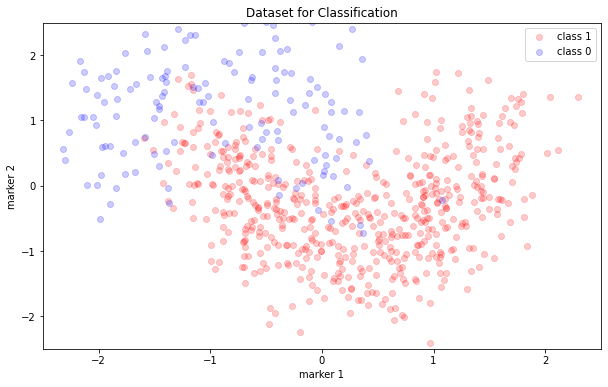

In [ ]:
# Visualize Dataset
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
scatter_plot_data(X_train, Y_train, ax)
ax.set_title('Dataset for Classification')
plt.show()

**Exercise 1:** What do you notice about this data set that can potentially cause problems for a classifier?

**Answer**:
AS observed from scatter plot there is there is class imbalance where red point dominate highly blue point his Couse the accuracy to be good for red class(1)  but really wrong for class(0) now in drawing conclusion we have to evaluate confusion matrix. 

The data is so noisy such that the points are interlocked and distributed over the classes. There is a number of red data points distributed in the blue data stronghold. The same is the case with blue data in the red data class.

In this case, finding a perfect classifier boundary would be challenging. It is easy to overfit or underfit in such a case since the data is so noisy.
The overfit can be yielded when trying to fit to the noise of the data to reduce the FPR and FNR. The underfit can be a product of trying to reduce the overfit and high variance, thus being so challenging to perfectly classify.

To classify this data set require model that than can find complex boundary in this data set.  


## 1. Fit a Logistic Regression Model

**Exercise 2:** Train a logistic regression on this data. Visualize the classification boundary of the model, and compute your model's confusion matrix, ROC curve and AUC. 


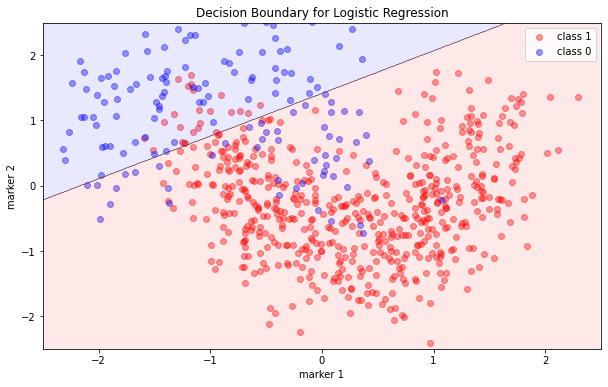

In [ ]:
# Step 1. Fit a logistic regression 
# COMPLETE
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
#threshold=0.1
model=logistic_regression
#print(model.predict_proba(X_train).max())
#print(model.predict_proba(X_train).min())
# Step 2. Visualize the decision boundary
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_decision_boundary(X_train,Y_train ,model, ax, limit=None, poly_degree=1, threshold=0.5)
#plot_decision_boundary(x, y, model, ax, limit=None, poly_degree=1, threshold=0.5)
ax.set_title('Decision Boundary for Logistic Regression')
plt.show()

Test accuracy: 0.8666666666666667
Confusion matrix for the classification on test:
 [[ 39  22]
 [ 18 221]]


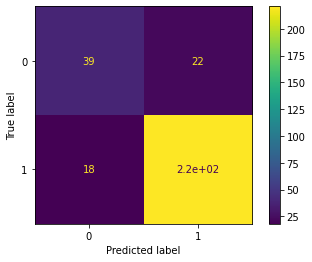

In [ ]:
### Evaluate the training and testing performance of your model 
# Step 1: Predict using your model
# COMPLETE
#preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
Y_predict = logistic_regression.predict(X_test)
#THRESHOLD = 0.2
#Y_predict = np.where(logistic_regression.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

# Step 2: Compute test accuracy
# COMPLETE
test_accuracy = accuracy_score(Y_test,Y_predict)
print('Test accuracy:', test_accuracy)

# Step 3: Compute the test confusion matrix
# COMPLETE
matrix = confusion_matrix(Y_test,Y_predict)
print('Confusion matrix for the classification on test:\n', matrix)
plot_confusion_matrix(logistic_regression, X_test, Y_test)
plt.show()


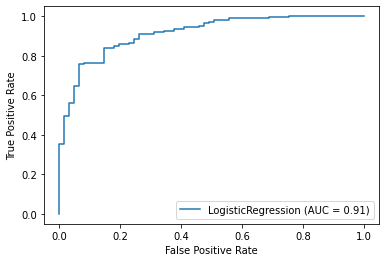

In [ ]:
# Step 4: Plot the ROC curve
# Hint: see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html
# COMPLETE
plot_roc_curve(logistic_regression,X_test,Y_test)
plt.show()

Best Threshold=0.832184, G-Mean=0.847


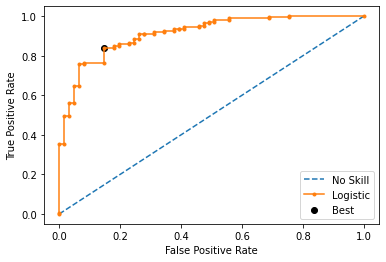

In [ ]:
yhat = logistic_regression.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**Exercise 3:** Looking at your model's classification boundary, how well does your model fit the data? What are the shortcomings of your model?

**Answer**:
The classification boundary clearly shows that the model does not fit the data well. Due to noise in the data, there is a substantial number of data points which are positioned in the wrong side of the boundary as false negatives and positives. This is worrisome, especially for the minority class 0 with its huge proportion lying the other side,
As we find it in comment of scatter function say that this data set is related to cancer disease where positive(1) means have cancer and 0 means no cancer. 

A high rate of cases with cancer would be predicted negative, hence leaving those untreated and a high rate of cases who are not cancerous would be predicted positive, thus  without waiting testing model this model must be rejected automatically .


**Exercise 4:** Looking at your confusion matrix, what are the model's False Positive Rate and False Negative Rate?

**Answer**:

***Considering class 0 and class 1 as negatives and positives respectively ***

**False Negative rate=18/(18+220)*100%=7.7%%**

**False Positive rate=22/(22+39)*100%=36.06%**

**Exercise 4:** Looking at the plot of the ROC curve, what threshold would you choose for your classifier? How does this choice affect the False Positive Rates? How does this choice affect the False Negative Rates?

**Answer**:



According to the ROC curve, the appropriate threshold is 0.832184. This is at the lowest value of FPR when TPR is maximum. Increasing the threshold like that would decrease the FPR and increase the FNR. This will be so, due to the reduced space in the positive class for negative data points closer to the boundary to fall into. On the other side, the space for negative class would be increased hence having many data points closer to the boundary from the other class falling in there.



**Exercise 5:** Change the classification threshold to the optimal one you selected in Exercise 4. Visualize the new decision boundary. Compute the confusion matrix using the new threshold. How does the new confusion matrix compared with the one computed in Exercise 2?

**Answer**:

According to the ROC curve, the appropriate threshold is 0.832184. This is at the lowest value of FPR when TPR is maximum. Increasing the threshold like that would decrease the FPR and increase the FNR. This will be so, due to the reduced space in the positive class for negative data points closer to the boundary to fall into. On the other side, the space for negative class would be increased hence having many data points closer to the boundary from the other class falling in there. According to the domain of medicine this model is not good since false negative rate are very higher.

In [ ]:
# Step 1: compute the probability of being in each class
Y_probability = logistic_regression.predict_proba(X_test)
#print(Y_probability)
# Step 2: the returned array has two columns: 
# one for the probability of class 0 and one for the probability of class 1. 
# Since this is a binary classification problem, we only care about the probability
# of being in class 1 or not. Thus, we take the 1st column as follows:
Y_probability = Y_probability[:, 1]

# Step 3: set a threshold
threshold = 0.832184

## Step 4: classify as '1' when the probability is bigger than the threshold
## other, set the probability to 0
Y_predict = Y_probability
Y_predict[Y_probability >= threshold] = 1
Y_predict[Y_probability < threshold] = 0


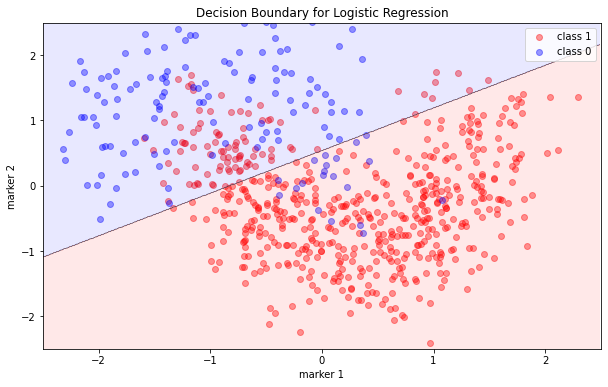

In [ ]:
# Step 5: visualize the new decision boundary with your new classification threshold!
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_decision_boundary(X_train, Y_train, logistic_regression, ax, threshold=threshold)
ax.set_title('Decision Boundary for Logistic Regression')
plt.show()

Confusion matrix for the classification on test:
 [[ 52   9]
 [ 38 201]]
True positive rate 0.8025751072961373
False positve rate 0.19742489270386265


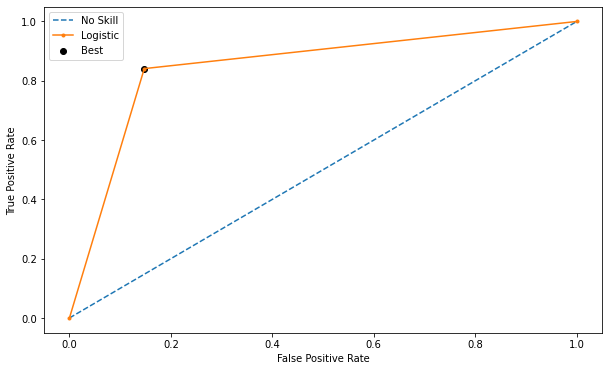

In [ ]:
#printing ROC Curve
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

fpr, tpr, thresholds = roc_curve(Y_test, Y_probability)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
#print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot

print('Confusion matrix for the classification on test:\n', matrix)
print("True positive rate",((187/(46+187))))
print("False positve rate",((46/(46+187))))
plt.show()


## 2. Fit a Neural Network Classifier

**Exercise 5:** Fit a neural network classifier. Find the best architecture and regularization strength for this dataset.
Visualize the training data as well as the decision boundary.
How well does the model fit the data?

**Answer**:

By using GridSearchCV library model turned with learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
epochs=500, batch_size=200, verbose=0


The model apparently fits the data well because it has less number of False Negatives as shown by the plot. This is good for our data because less rate of cancerous people can be left untreated if their data is fitted on the model. Even though the rate of False positives is realtively high, it would not cause any harm to the implementation of the results of the model. Also to adjust my model to fit to the domain of medicine I have tried to reduce  FNR by putting learing rate to 0.1 and it work well.



In [ ]:
## my gridSerch
## for neoron netork Network 

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
def create_model(learn_rate=0.01,momentum=0):
  # Step 1: Choose settings for the neural network
  H = 30 # number of hidden nodes
  input_dim = X_train.shape[1] # input dimension
  reg = l2(0.0000000001) # change the strength of the regularizer
  #print(X_train.shape[0])
  # Step 2: Create neural network
  model = Sequential()
  model.add(Dense(H, input_dim=input_dim, activation='tanh', kernel_regularizer=reg, bias_regularizer=reg)) # input layer
  model.add(Dense(H, activation='tanh', kernel_regularizer=reg, bias_regularizer=reg)) # hidden layer 1
  model.add(Dense(1, activation='sigmoid', kernel_regularizer=reg, bias_regularizer=reg)) # output layer

  # Step 3: Configure the model
  #learning_rate = 0.1
  sgd = SGD(lr=learn_rate, momentum=momentum)
  model.compile(optimizer=sgd, loss='binary_crossentropy',metrics=['accuracy'])
  return model
model = KerasClassifier(build_fn=create_model, epochs=500, batch_size=200, verbose=0)
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Best: 0.930022 using {'learn_rate': 0.2, 'momentum': 0.9}
0.897142 (0.014019) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.891438 (0.013180) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.897142 (0.014019) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.895724 (0.016493) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.894293 (0.011186) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.895730 (0.016070) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.894300 (0.017192) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.897155 (0.015187) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.900016 (0.019207) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.902865 (0.014533) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.914304 (0.015157) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.925712 (0.015812) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.925718 (0.010677) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.927155 (0.018490) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.930010 (0.016514) with: {'learn_rate': 0

In [ ]:
# Step 1: Choose settings for the neural network
H = 30 # number of hidden nodes
input_dim = X_train.shape[1] # input dimension
reg = l2(0.0000000001) # change the strength of the regularizer
#print(X_train.shape[0])
# Step 2: Create neural network
model = Sequential()
model.add(Dense(H, input_dim=input_dim, activation='tanh', kernel_regularizer=reg, bias_regularizer=reg)) # input layer
model.add(Dense(H, activation='tanh', kernel_regularizer=reg, bias_regularizer=reg)) # hidden layer 1
model.add(Dense(1, activation='sigmoid', kernel_regularizer=reg, bias_regularizer=reg)) # output layer

# Step 3: Configure the model
learning_rate = 0.1
sgd = SGD(lr=learning_rate,momentum=0.0)
model.compile(optimizer=sgd, loss='binary_crossentropy')


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Step 4: Fit the model
history = model.fit(X_train, Y_train, batch_size=200, epochs=500, verbose=0)

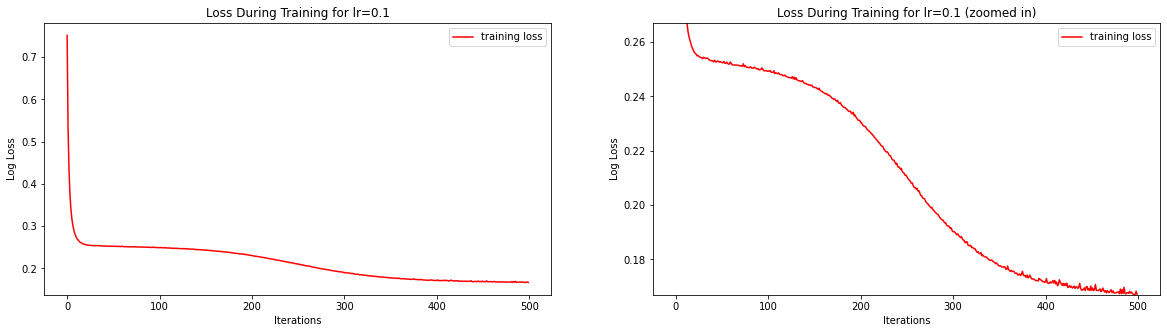

In [ ]:
# Step 5: Visualize the trace of loss function
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Visualize the training trajectory
ax[0].plot(np.array(history.history['loss']), color='red', label='training loss')
ax[0].legend(loc="best")
ax[0].set_title("Loss During Training for lr={}".format(learning_rate))
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Log Loss")

# Visualize the training trajectory (zoomed in)
ax[1].plot(np.array(history.history['loss']), color='red', label='training loss')
ax[1].legend(loc="best")
ax[1].set_title("Loss During Training for lr={} (zoomed in)".format(learning_rate))
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Log Loss")
ax[1].set_ylim((np.min(np.array(history.history['loss'])), np.min(np.array(history.history['loss']) + 0.1)))
plt.show()

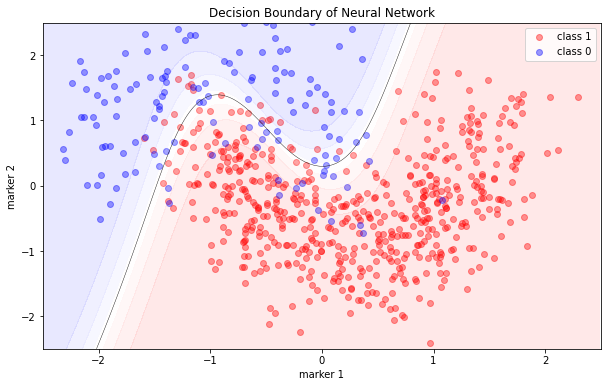

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Step 6: Visualize decision boundary
plot_decision_boundary(X_train, Y_train, model, ax)
ax.set_title('Decision Boundary of Neural Network')
plt.show()

**Exercise 6:** Compute the confusion matrix, the AUC and plot the ROC curve. Based on these metrics how well is your model doing?

**Answer**:

 Accuracy of model is good but as we know from starting we cannot drown conclusion based on it since there is unbalance of class of our dataset.  
The matrix shows the low numbers of False Negatives which matters most in our dataset although the numbers for True and False Negatives are low and high correspondingly.
On the other hand, the ROC curve shows that AUC is good because greater than 0.7. The highest values of TPR are observed at high values of FPR, thus the curve covering a small area. However, this small AUC does not matter because the nature of the data focuses on high TPR and low FNR not FPR.
All in all, both metrics depicts the same reliability of the model as they both show that less rate of cancerous cases would be denied of having cancer and a higher rate would be predicted positive. That is a reason good enough to declare a model good.


In [ ]:
### Evaluate the training and testing performance of your model 
# Step 1: Predict labels using your model (use the method predict_classes: https://kite.com/python/docs/tensorflow.keras.Sequential.predict_classes)
# COMPLETE
Y_predict=model.predict_classes(X_test)

# Step 2: Compute the test confusion matrix
# COMPLETE
matrix=confusion_matrix(Y_test,Y_predict)
print('Confusion matrix for the classification on test:\n', matrix)



Confusion matrix for the classification on test:
 [[ 47  14]
 [ 10 229]]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Best Threshold=0.893094, G-Mean=0.889


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


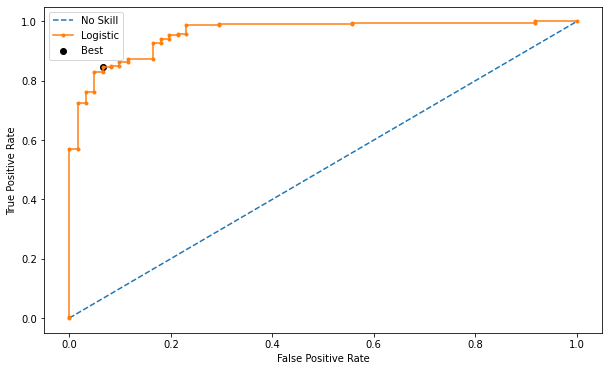

In [ ]:
# Step 4: Compute the ROC curve using roc_curve, this returns the false positive rate, true positive rate and thresholds
# Hint: check documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# COMPLETE
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat
fpr, tpr, thresholds = roc_curve(Y_test, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**Exercise 7:** Change the classification threshold to the optimal one using the ROC curve. Visualize the new decision boundary. Compute the confusion matrix using the new threshold. How does the new confusion matrix compared with the one computed in Exercise 2?

**Answer**:

**confusion matrix  computed in Exercise 2**

$\begin{bmatrix}
39 & 22 \\
18 & 221 
\end{bmatrix}$


**new confusion matrix**

$\begin{bmatrix}
47 & 14 \\
10& 229
\end{bmatrix}$


As you can see in two confusion matrix above for new matrix FPR, FPR is reduced but TPR is increased and TNR which make this neuron network model to be Good compared to the logistic regression model. 
All in all, the new rates seem to contribute more to the goodness of fit of the model as compared to the initial ones since the TPR and FPR have been increased and decreased respectively.But in domain of life still not Good since FNR is still higher in this domain. 





In [ ]:
# Step 2: compute the probability of being in each class
# COMPLETE

# Step 3: set a threshold
# COMPLETE
threshold = 0.893094
# Step 4: classify as '1' when the probability is bigger than the threshold
# other, set the probability to 0
# COMPLETE

Y_probability = model.predict_proba(X_test)
#print(Y_probability)
Y_predict = Y_probability
Y_predict[Y_probability >= threshold] = 1
Y_predict[Y_probability < threshold] = 0

# Step 5: Compute the accuracy (Hint: use accuracy_score method)
# COMPLETE
test_accuracy = accuracy_score(Y_test,Y_predict)
print('Test Accuracy:', test_accuracy)

# Step 6: Compute the test confusion matrix
matrix=confusion_matrix(Y_test,Y_predict)
print('Confusion matrix for the classification on test:\n', matrix)

Test Accuracy: 0.8633333333333333
Confusion matrix for the classification on test:
 [[ 57   4]
 [ 37 202]]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


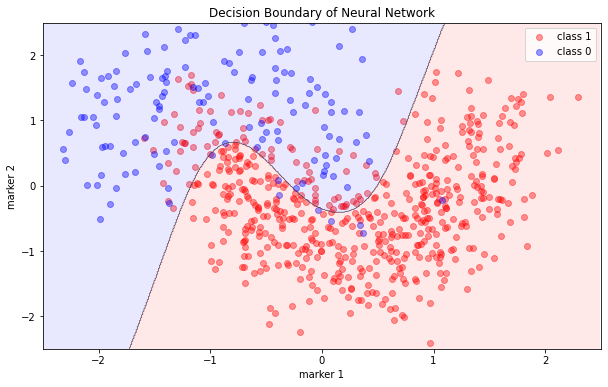

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Step 1: Visualize decision boudnary
plot_decision_boundary_neoron(X_train, Y_train, model, ax, threshold=threshold)
ax.set_title('Decision Boundary of Neural Network')
plt.show()